# LMS Exploration | scikit-learn Digits Classifier

---

**[Introduce]**

- 0~9 숫자이미지 분류기


- 숫자이미지 분류기는 각 이미지 데이터가 입력되었을 때 그 이미지가 숫자 몇을 나타내는 이미지인지 맞추는 분류모델이다.


- scikit-learn이 제공하는 Toy datasets 을 활용한다. 


- Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression 의 다양한 머신러닝 모델로 학습시키고, 평가해본다.


**[dataset]**

- scikit-learn이 예제로 제공하는 Toy datasets 중 load_digits dataset 을 활용한다.


- load_digits의 data는 총 1797개이고, feature는 64개의 픽셀값(8x8 이미지)이며, label은 0~9 사이의 숫자이다.


- 숫자이미지는 총 43명의 손글씨가 사용되었으며, 이 중 30명의 손글씨는 훈련 데이터에, 나머지 13명의 손글씨는 테스트 데이터로 구성한다.

## 1. 모듈 import

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

## 2. 데이터 준비

In [2]:
digits = load_digits()
digits_data = digits.data

## 3. 데이터 이해하기

Feature Data 지정, Label Data 지정, Target Names 출력, 데이터 Describe 하기

In [3]:
print(digits.keys()) #객체가 가진 변수와 메서드 나열 출력
print(digits_data.shape) #배열의 형상정보 출력
digits_data[0] # index가 0인 데이터 출력

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
(1797, 64)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

- digits의 data는 1797개의 데이터가 각각 64개의 정보를 담고 있음.
- digits 는 이미지 데이터로, 각 숫자는 픽셀을 의미함. 길이 64의 숫자 배열은 (8x8) 크기의 이미지를 일렬로 펴 놓은 것임. 


In [4]:
digits_label = digits.target 
print(digits_label.shape)
digits_label

(1797,)


array([0, 1, 2, ..., 8, 9, 8])

In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- target 데이터는 총 1797 개의 데이터가 있고, 0부터 9까지의 숫자로 나타남. 

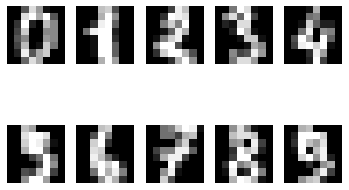

In [6]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [7]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## 4. train, test 데이터 분리

In [8]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


## 5. 다양한 모델로 학습시켜보기

Decision Tree, Random Forest, SVM, SGD Classifier, Logistic Regression

### 5-1. Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

### 5-2. Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=32)

### 5-3. SVM

In [11]:
from sklearn import svm

svm_model = svm.SVC(random_state=32)
svm_model.fit(X_train, y_train)

SVC(random_state=32)

### 5-4. SGD Classifier

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state=32)
sgd_model.fit(X_train, y_train)

SGDClassifier(random_state=32)

### 5-5. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(random_state=32, max_iter = 50000, solver='lbfgs')
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=50000, random_state=32)

## 6. 모델 평가해 보기

- 모델의 성능을 평가하는 지표로 무엇이 적절할까?
- sklearn.metrics에서 제공하는 평가지표중 적절한 것은 선택하고, 선택한 이유를 설명하라

### 6-1. Classification Report

In [14]:
#- Decision Tree

y_pred_DT = decision_tree.predict(X_test)
accuracy_DT = accuracy_score(y_test, y_pred_DT)

print(f'\n[Decision Tree Classifier]\n')
print(classification_report(y_test, y_pred_DT))

#- Random Forest

y_pred_RF = random_forest.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)

print('\n[Random Forest Classifier]\n')
print(classification_report(y_test, y_pred_RF))

#- SVM

y_pred_SVM = svm_model.predict(X_test)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)

print('\n[SVM Classifier]\n')
print(classification_report(y_test, y_pred_SVM))

#- SGD

y_pred_SGD = sgd_model.predict(X_test)
accuracy_SGD = accuracy_score(y_test, y_pred_SGD)

print('\n[SGD Classifier]\n')
print(classification_report(y_test, y_pred_SGD))

#- Logistic Regression

y_pred_LR = logistic_model.predict(X_test)
accuracy_LR = accuracy_score(y_test, y_pred_LR)

print('\n[Logistic Regression Classifier]\n')
print(classification_report(y_test, y_pred_LR))


[Decision Tree Classifier]

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360


[Random Forest Classifier]

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1

### 6-2. Visualize Confusion Matrix 

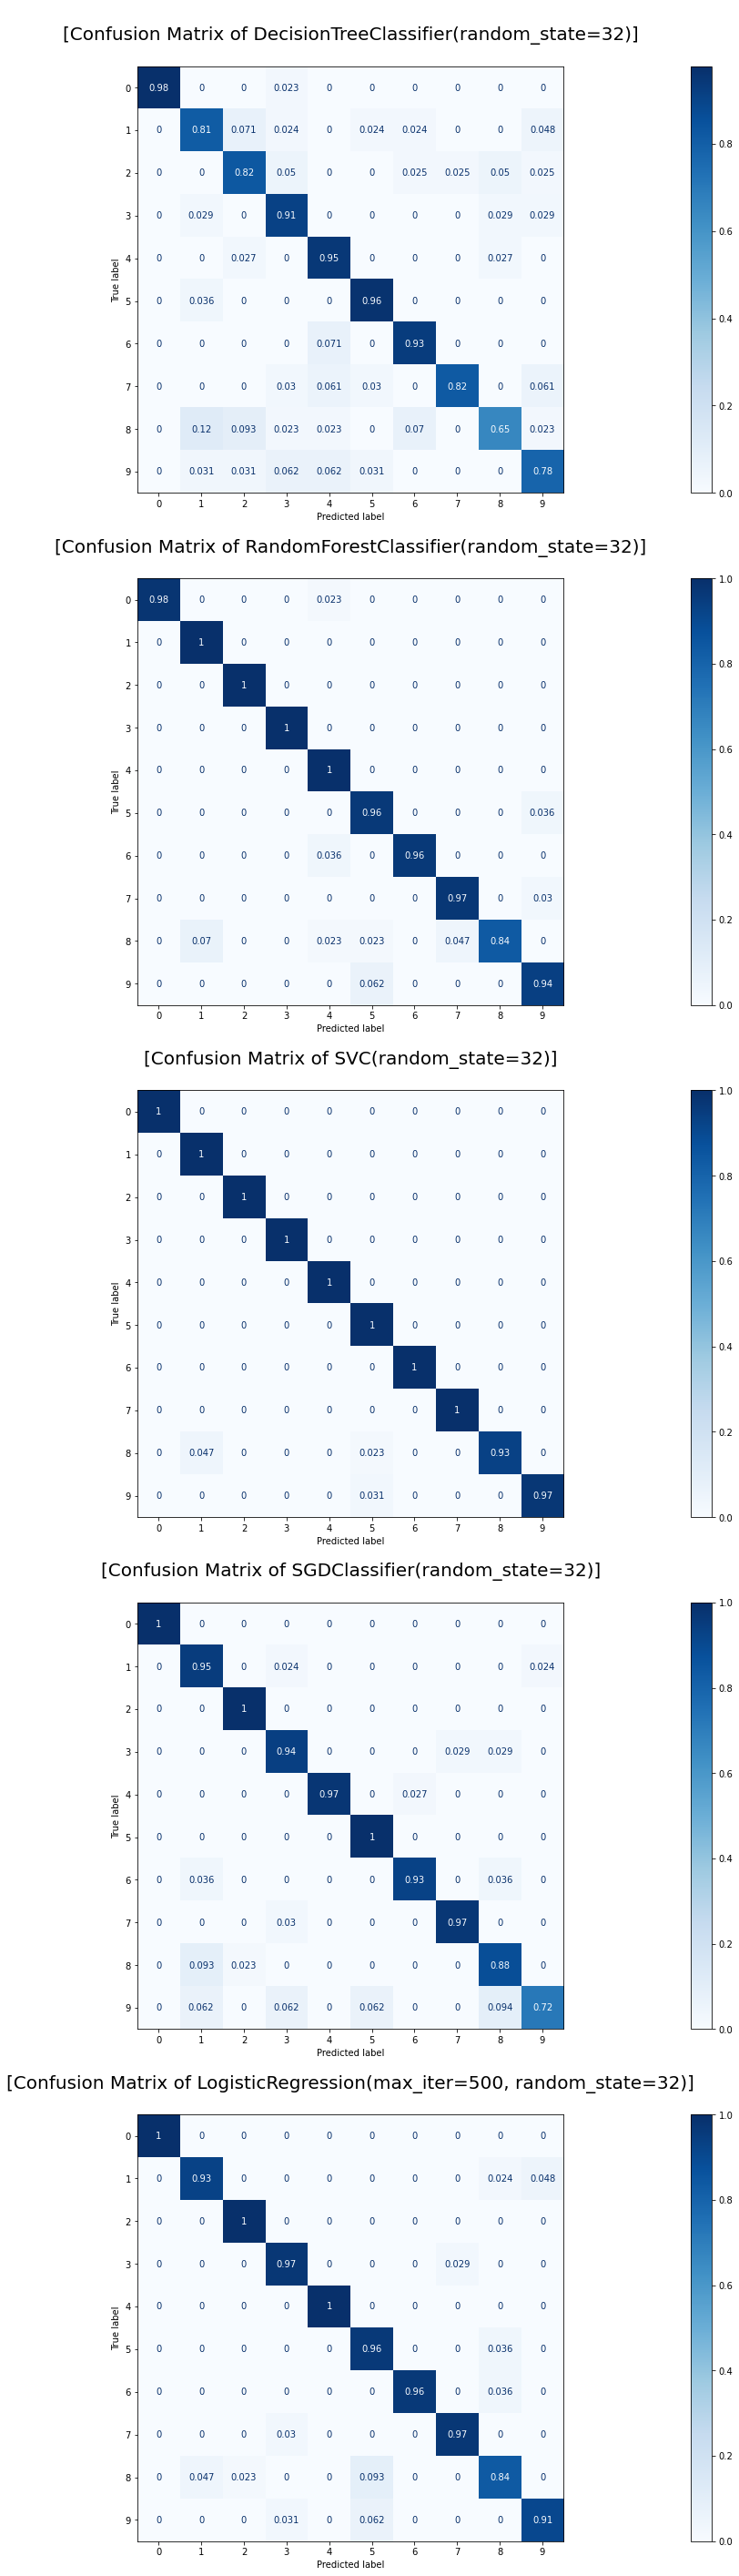

In [15]:
#- Confusion Matrix 시각화 함수
from sklearn.metrics import plot_confusion_matrix


def Visualize_Confusion_Matrix(model, X_test, y_test, label):
    #fig, ax = plt.subplots(figsize=(50, 50))
    plot = plot_confusion_matrix(model, X_test, y_test, display_labels=label, cmap=plt.cm.Blues, normalize='true', ax=ax)
    plot.ax_.set_title(f'\n[Confusion Matrix of {model}]\n', fontsize=20) 
    
model = [decision_tree, random_forest, svm_model, sgd_model, logistic_model]

fig = plt.figure(figsize=(50,50))
for i in range (len(model)):
    ax = fig.add_subplot(len(model),1,i+1)
    Visualize_Confusion_Matrix(model[i], X_test, y_test, digits.target_names )
        

### 6-3. Compare Accuracy
각 모델의 test accuracy를 비교하여 가장 성능이 좋은 모델을 선정한다.

In [16]:
import operator

dict = {'Decision Tree':accuracy_DT, 'Random Forest':accuracy_RF, 'SVM':accuracy_SVM, 'SGD Classifier':accuracy_SGD, 'Logistic Regression':accuracy_LR}
sdict = sorted(dict.items(), key=operator.itemgetter(1), reverse=True)

print('\n[정확도가 높은 모델 순서]\n')
for i in range(len(sdict)):
    print(f'{i+1}.{sdict[i][0]}, 정확도 : {sdict[i][1]} ')
    
print(f'\n\n가장 정확도가 높은 모델은 {sdict[0][0]}이고, 정확도는 {sdict[0][1]}이며, \n가장 정확도가 낮은 모델은 {sdict[len(sdict)-1][0]}이고, 정확도는 {sdict[len(sdict)-1][1]}입니다\n')


[정확도가 높은 모델 순서]

1.SVM, 정확도 : 0.9888888888888889 
2.Random Forest, 정확도 : 0.9638888888888889 
3.Logistic Regression, 정확도 : 0.9527777777777777 
4.SGD Classifier, 정확도 : 0.9388888888888889 
5.Decision Tree, 정확도 : 0.8555555555555555 


가장 정확도가 높은 모델은 SVM이고, 정확도는 0.9888888888888889이며, 
가장 정확도가 낮은 모델은 Decision Tree이고, 정확도는 0.8555555555555555입니다



## 7. 프로젝트 정리 | Summary

---

### 7-1. 성능평가

**Best Machine Learning Model** : SVM

**test_accuracy** : 0.9888888888888889

digits 데이터는 균형 잡힌 dataset으로, confusion matrix에서 각 target(숫자 0~9)의 정답률이 균형있게 나타난다. 그렇기에 digits classification 모델의 성능을 평가하는 가장 중요한 지표는 '전체 데이터 중 올바르게 판단한 데이터 개수의 비율' 즉, Accuracy 지표이다. 

숫자 이미지를 얼마나 정확하게 분류 해내는지가 숫자이미지분류기의 성능을 평가하는 중요한 지표인 것이다.


결과적으로, digits Classification 문제 해결에 SVC Classification Model이 가장 적합하다. 

### 7-2. 자가평가

머신러닝에 있어서 가장 쉬운 것이 '학습'이고 '데이터 전처리'와 '성능평가'가 어렵고 중요한 부분이라는 생각이 들었다. scikit-learn 에서 제공하는 양질의 데이터를 사용했기 때문에 데이터 전처리의 수고는 아낄 수 있었지만, dataset에 대해 모델의 평가지표를 선택하는 것이 어려웠다. 모델의 평가지표를 선택함에 있어서 '정확도의 함수'에 빠지지 않기 위해서는, dataset의 전반적인 특성을 고려하여 precision, recall 등의 다양한 평가지표를 고려해야 한다는 것을 배웠다. 앞으로 다양한 모델에 대한 이해가 뒷받침 된다면 성능평가의 지표를 선택하는 것도 한결 수월해질 것이라 기대한다.  

